In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white')


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB

In [11]:
train = pd.read_csv("final_train.csv")

In [12]:
y = train.LoanStatus
X = train.drop('LoanStatus',axis=1)

In [13]:
X = pd.get_dummies(X)

## Check cross validation scores with different algorithms 

In [14]:
from sklearn.model_selection import cross_val_score
all_scores = {}

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [26]:
names = ['LR','KNN','NB','DT','SVC']
clfs =  [LogisticRegression(max_iter=200), KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(),SVC(max_iter=500)]

In [28]:
for clf,name in zip(clfs, names):
   scores = cross_val_score(clf,X_scaled,y,cv=5)
   #print(scores)
   print(f"{name} = {scores.mean()*100:0.2f}")
   all_scores[name] = (scores.mean() * 100)

LR = 81.39
KNN = 74.29
NB = 80.32
DT = 74.65
SVC = 81.21


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Anaconda3\lib

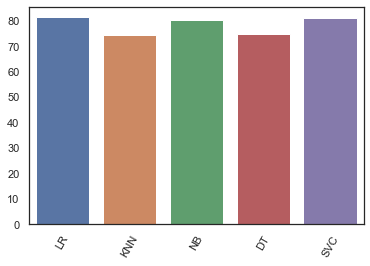

In [29]:
plt = sns.barplot(x = list(all_scores.keys()), y = list(all_scores.values()))
ax = plt.set_xticklabels(labels = all_scores.keys(),rotation=60)

### Logistic Regression with built-in Cross Validation

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [35]:
X_train, X_test, y_train, y_test =  train_test_split(X_scaled,y)

In [36]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, max_iter=500, random_state=0).fit(X_train, y_train)

In [37]:
score = clf.score(X_train,y_train)
print('Accuracy_score : ',score)   

Accuracy_score :  0.8203309692671394


### Testing with test data

In [40]:
y_pred = clf.predict(X_test)

In [41]:
confusion_matrix(y_test,y_pred)

array([[17, 26],
       [ 2, 96]], dtype=int64)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.45      0.62        33
           1       0.79      1.00      0.88        67

    accuracy                           0.82       100
   macro avg       0.89      0.73      0.75       100
weighted avg       0.86      0.82      0.80       100

